# Exploring 311 dataset for department resource utilization

## Data Analysis

To understand about the data and its distributions, we conducted further analysis to see important aspects like complaint type region wise, type of complaints, distribution of complaints department-wise and more. We delve deeper and understand the significance using visualizations to get a high-level overview of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3

In [2]:
df_perfect = pd.read_csv('311_preprocessed_dataset.csv')

In [3]:
df_perfect.shape

(243411, 19)

In [4]:
df_perfect.dtypes

POPULATION                float64
Agency                     object
Complaint Type             object
Location Type              object
Address Type               object
City                       object
Community Board            object
BBL                        object
Borough                    object
Open Data Channel Type     object
Latitude                  float64
Longitude                 float64
Resolution Time           float64
Created_Date_Year           int64
Created_Date_Month          int64
Created_Date_Day            int64
Created_Date_Hour           int64
Created_Date_Minute         int64
Created_Date_Second         int64
dtype: object

In [5]:
# Converting resolution time to hours
df_perfect['Resolution Time'] = df_perfect['Resolution Time'] / 3600

In [6]:
# Calculating number of complaints by boroughs
borough_complaints_count = df_perfect['Borough'].value_counts()

print("Boroughs by Number of Complaints:")
print(borough_complaints_count)

Boroughs by Number of Complaints:
Borough
BROOKLYN         73604
QUEENS           53083
BRONX            50372
MANHATTAN        47395
STATEN ISLAND    10861
Unspecified       8096
Name: count, dtype: int64


Text(0, 0.5, 'Frequency of Complaint Types')

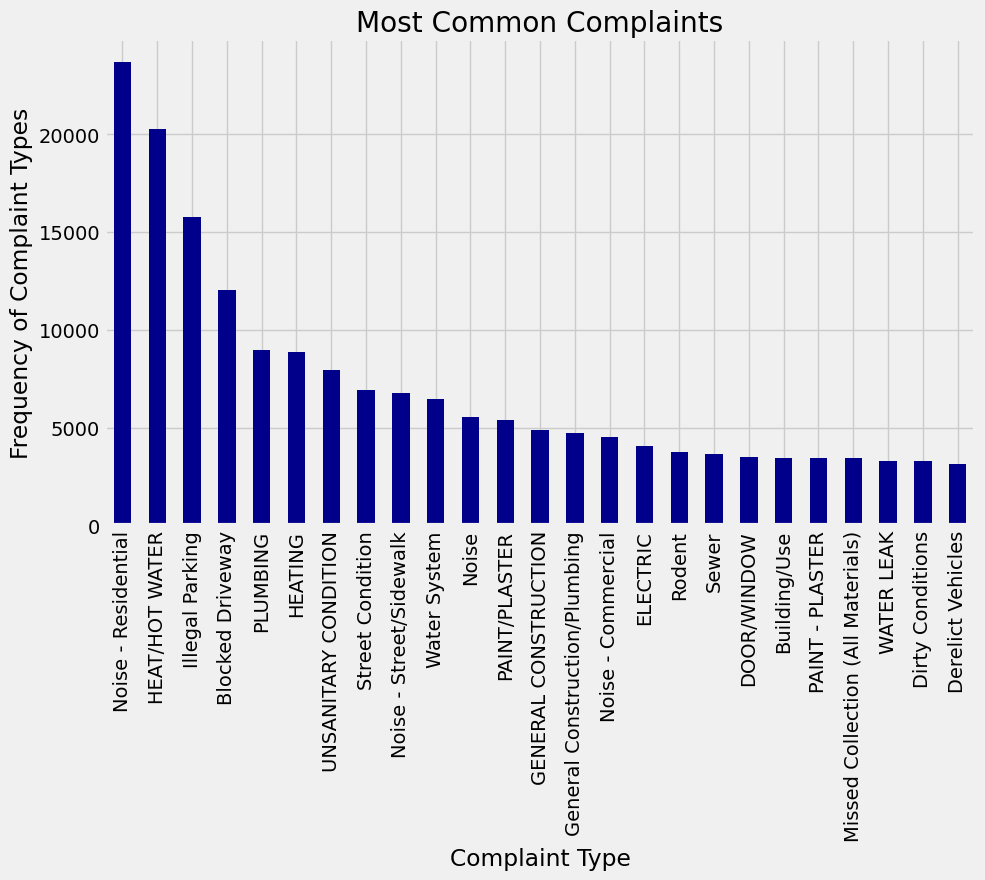

In [7]:
# PLotting bar chart of most common complaint types
ax = (df_perfect['Complaint Type'].value_counts()).head(25).plot(kind='bar', figsize=(10,6), title='Most Common Complaints', color='#00008B')
ax.set_xlabel("Complaint Type")
ax.set_ylabel("Frequency of Complaint Types")

(-74.28260504922883, -73.67303521183827, 40.478500261418446, 40.93355301121657)

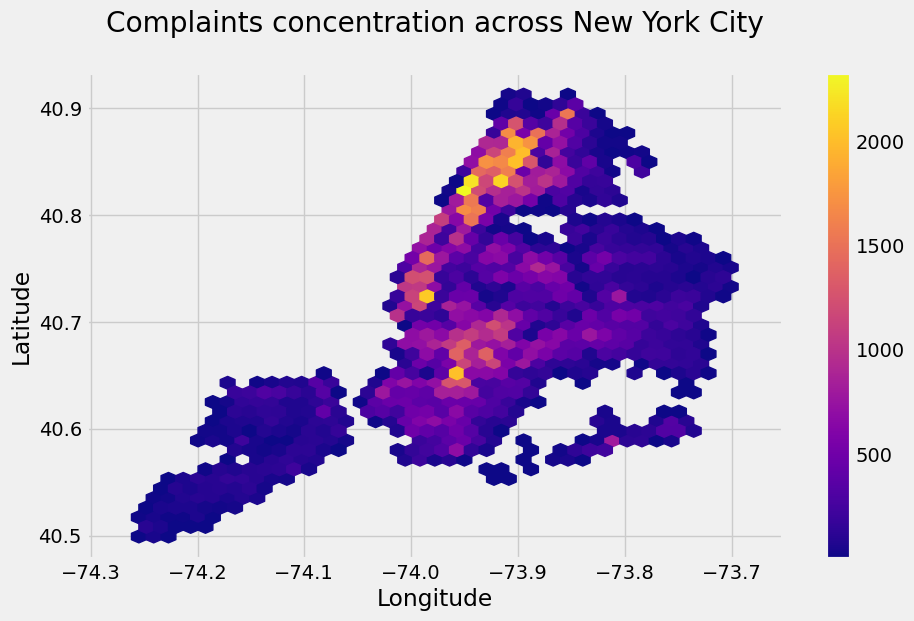

In [8]:
# Plotting complaint concentration heatmap of New York City
df_perfect.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
        colormap='plasma', mincnt=1,
        title='Complaints concentration across New York City\n', figsize=(10, 6)).axis('equal')


C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\620491807.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top_complaints))


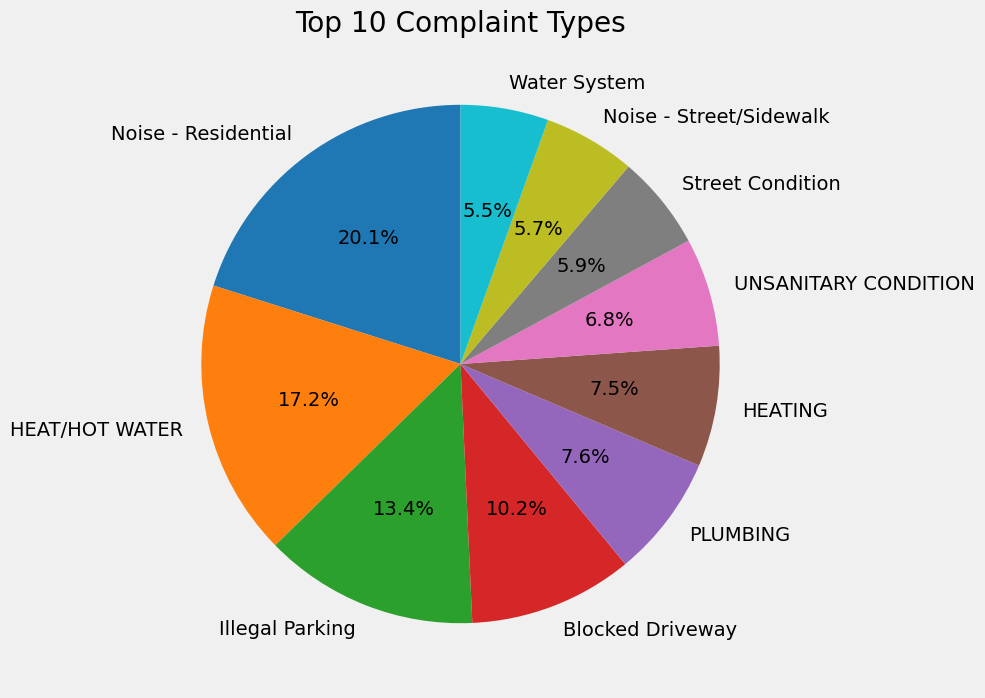

In [9]:
# Plotting pie chart of top 10 Complaint Types
from matplotlib.colors import ListedColormap
top_complaints = df_perfect['Complaint Type'].value_counts().nlargest(10)

colors = plt.cm.get_cmap('tab10', len(top_complaints))
custom_cmap = ListedColormap(colors(range(len(top_complaints))))

plt.figure(figsize=(10, 8))
plt.pie(top_complaints, labels=top_complaints.index, autopct='%1.1f%%', startangle=90, colors=custom_cmap.colors)
plt.title('Top 10 Complaint Types')
plt.show()

In [10]:
# Copying data from 2020 to 2022 into new dataset for seasonal variations
df2 = df_perfect[(df_perfect['Created_Date_Year'] >= 2020) & (df_perfect['Created_Date_Year'] <= 2022)].copy()
df2

,POPULATION,Agency,Complaint Type,Location Type,Address Type,City,Community Board,BBL,Borough,Open Data Channel Type,Latitude,Longitude,Resolution Time,Created_Date_Year,Created_Date_Month,Created_Date_Day,Created_Date_Hour,Created_Date_Minute,Created_Date_Second
0,18681.0,DSNY,Request Large Bulky Item Collection,Sidewalk,ADDRESS,JAMAICA,12 QUEENS,4119740061.0,QUEENS,PHONE,40.683600,-73.799361,79.250000,2022,2,7,16,45,0
1,18681.0,DSNY,Missed Collection,Street,ADDRESS,JAMAICA,12 QUEENS,4119900061.0,QUEENS,ONLINE,40.683172,-73.796164,241.019167,2022,2,18,10,14,47
2,18681.0,NYPD,Illegal Parking,Street/Sidewalk,ADDRESS,JAMAICA,12 QUEENS,4120550062.0,QUEENS,PHONE,40.671346,-73.800461,1.160000,2022,2,22,17,20,38
3,18681.0,DSNY,Request Large Bulky Item Collection,Sidewalk,ADDRESS,JAMAICA,12 QUEENS,4121070037.0,QUEENS,PHONE,40.671214,-73.789485,35.133333,2022,2,23,12,52,0
4,18681.0,DSNY,Obstruction,Street,ADDRESS,JAMAICA,12 QUEENS,4120010020.0,QUEENS,PHONE,40.679596,-73.798464,69.712500,2022,3,2,16,9,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243406,28481.0,DSNY,Request Large Bulky Item Collection,Sidewalk,ADDRESS,BROOKLYN,01 BROOKLYN,3023170019.0,BROOKLYN,PHONE,40.720320,-73.960252,77.383333,2021,12,27,18,37,0
243407,28481.0,DEP,Water System,Unspecified,ADDRESS,BROOKLYN,01 BROOKLYN,3023597501.0,BROOKLYN,PHONE,40.716151,-73.961658,0.000000,2022,1,14,1,58,0
243408,28481.0,DEP,Water System,Unspecified,ADDRESS,BROOKLYN,01 BROOKLYN,3023580018.0,BROOKLYN,ONLINE,40.716110,-73.961734,0.000000,2022,1,18,8,43,0
243409,28481.0,DSNY,Derelict Vehicles,Street,ADDRESS,BROOKLYN,01 BROOKLYN,3024050046.0,BROOKLYN,PHONE,40.713747,-73.963365,48.000000,2022,1,29,12,0,0


In [11]:
df2.columns

Index(['POPULATION', 'Agency', 'Complaint Type', 'Location Type',
       'Address Type', 'City', 'Community Board', 'BBL', 'Borough',
       'Open Data Channel Type', 'Latitude', 'Longitude', 'Resolution Time',
       'Created_Date_Year', 'Created_Date_Month', 'Created_Date_Day',
       'Created_Date_Hour', 'Created_Date_Minute', 'Created_Date_Second'],
      dtype='object')

In [12]:
unique_years = df2['Created_Date_Year'].unique()
print("Unique Years in the DataFrame:")
print(unique_years)

Unique Years in the DataFrame:
[2022 2021 2020]


In [13]:
import pandas as pd
df2['Created_Date_Year'] = pd.to_datetime(df2['Created_Date_Year'])

# Defining a function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Creating a new column 'Season' based on the 'Created Date'
df2['Season'] = df2['Created_Date_Month'].apply(get_season)

# Display the updated DataFrame
print(df2.head())


   POPULATION Agency                       Complaint Type    Location Type  \
0     18681.0   DSNY  Request Large Bulky Item Collection         Sidewalk   
1     18681.0   DSNY                    Missed Collection           Street   
2     18681.0   NYPD                      Illegal Parking  Street/Sidewalk   
3     18681.0   DSNY  Request Large Bulky Item Collection         Sidewalk   
4     18681.0   DSNY                          Obstruction           Street   

  Address Type     City Community Board           BBL Borough  \
0      ADDRESS  JAMAICA       12 QUEENS  4119740061.0  QUEENS   
1      ADDRESS  JAMAICA       12 QUEENS  4119900061.0  QUEENS   
2      ADDRESS  JAMAICA       12 QUEENS  4120550062.0  QUEENS   
3      ADDRESS  JAMAICA       12 QUEENS  4121070037.0  QUEENS   
4      ADDRESS  JAMAICA       12 QUEENS  4120010020.0  QUEENS   

  Open Data Channel Type   Latitude  Longitude  Resolution Time  \
0                  PHONE  40.683600 -73.799361        79.250000   
1     

In [14]:
print("The seasons present in updated dataframe are:\n")
df2['Season'].unique()

The seasons present in updated dataframe are:



array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\2133227455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


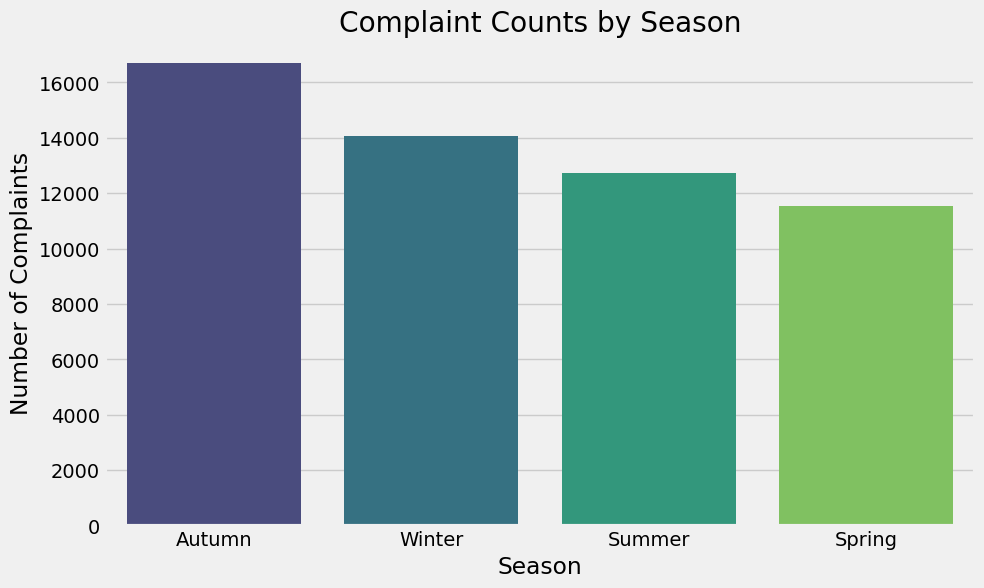

In [15]:
import seaborn as sns
season_counts = df2['Season'].value_counts()

# Plotting the bar plot of complaint  counts by season
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Complaint Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Complaints')
plt.show()

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\2705425583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summer_complaints.index, y=summer_complaints.values, palette='viridis')


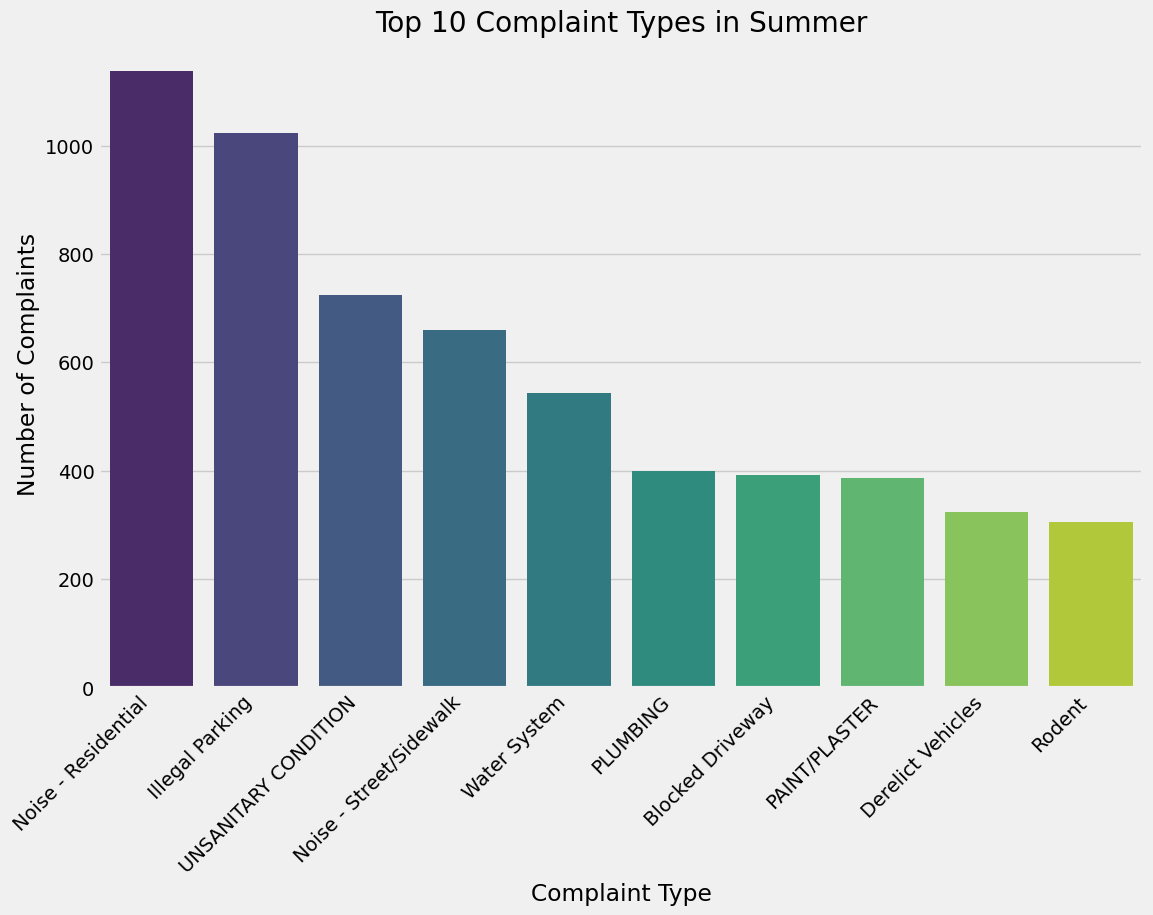

In [16]:
summer_complaints = df2[df2['Season'] == 'Summer']['Complaint Type'].value_counts().nlargest(10)

# Plotting the bar plot of top 10 complaint types in summer
plt.figure(figsize=(12, 8))
sns.barplot(x=summer_complaints.index, y=summer_complaints.values, palette='viridis')
plt.title('Top 10 Complaint Types in Summer')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [17]:
boroughs = df_perfect['Borough'].unique()
borough_dfs = {borough: df_perfect[df_perfect['Borough'] == borough].copy() for borough in boroughs}
dsc = []
# Example usage of one of the borough DataFrames (let's say 'Manhattan')
print("Example DataFrame for Manhattan:")
print(borough_dfs['MANHATTAN'].head())

Example DataFrame for Manhattan:
       POPULATION Agency        Complaint Type         Location Type  \
31094     70641.0    HPD        HEAT/HOT WATER  RESIDENTIAL BUILDING   
31142     70641.0    HPD  UNSANITARY CONDITION  RESIDENTIAL BUILDING   
31215     70641.0    HPD              ELECTRIC  RESIDENTIAL BUILDING   
31216     70641.0    HPD        HEAT/HOT WATER  RESIDENTIAL BUILDING   
31226     70641.0    HPD         PAINT/PLASTER  RESIDENTIAL BUILDING   

      Address Type      City Community Board           BBL    Borough  \
31094      ADDRESS  NEW YORK        08 BRONX  1022150326.0  MANHATTAN   
31142      ADDRESS  NEW YORK        08 BRONX  1022150339.0  MANHATTAN   
31215      ADDRESS  NEW YORK        08 BRONX  1022150339.0  MANHATTAN   
31216      ADDRESS  NEW YORK        08 BRONX  1022150352.0  MANHATTAN   
31226      ADDRESS  NEW YORK        08 BRONX  1022150535.0  MANHATTAN   

      Open Data Channel Type   Latitude  Longitude  Resolution Time  \
31094                 ON

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\2883821882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


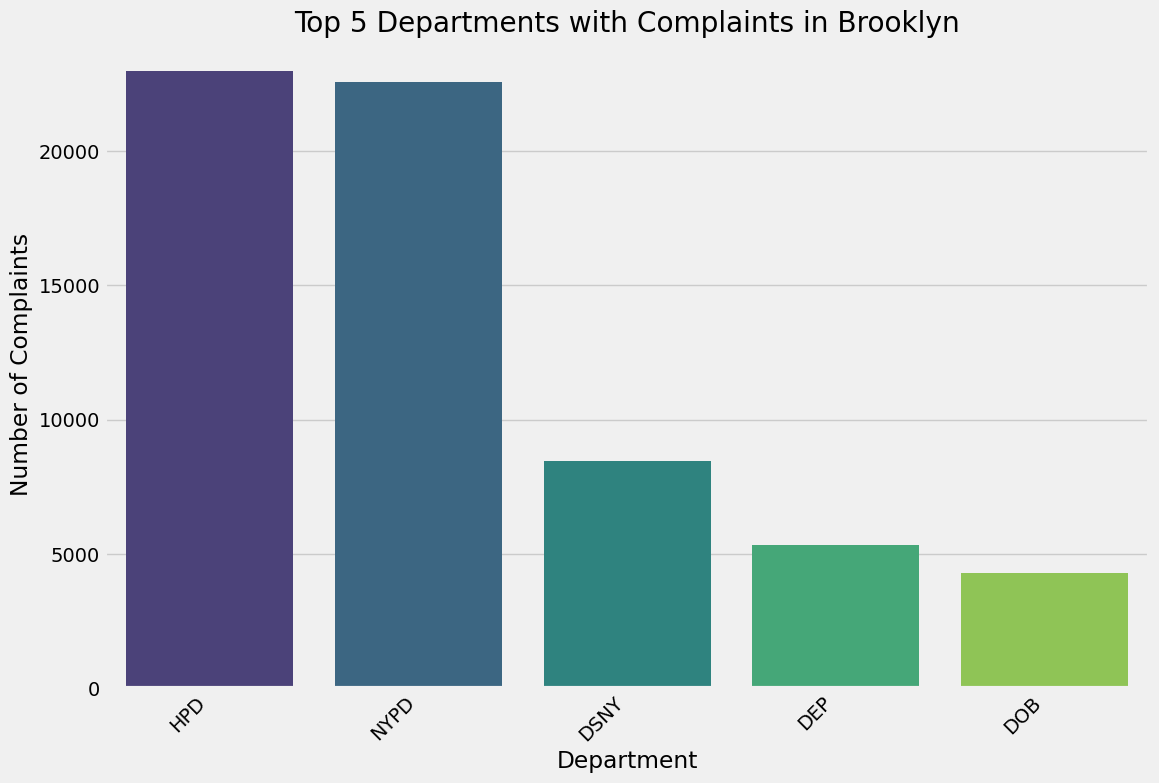

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

brooklyn_df = borough_dfs['BROOKLYN']

# Count the number of complaints against each department
agency_counts = brooklyn_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Brooklyn')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [19]:
# Creating df for Brooklyn
brooklyn_df = borough_dfs['BROOKLYN']

# Create a new DataFrame with values from the 'HPD' department
hpd_df = brooklyn_df[brooklyn_df['Agency'] == 'HPD'].copy()

# Display the new DataFrame
print("DataFrame for HPD in Brooklyn:")
print(hpd_df.head())

DataFrame for HPD in Brooklyn:
     POPULATION Agency        Complaint Type         Location Type  \
519     62426.0    HPD                SAFETY  RESIDENTIAL BUILDING   
521     62426.0    HPD        HEAT/HOT WATER  RESIDENTIAL BUILDING   
522     62426.0    HPD  UNSANITARY CONDITION  RESIDENTIAL BUILDING   
523     62426.0    HPD        HEAT/HOT WATER  RESIDENTIAL BUILDING   
524     62426.0    HPD        HEAT/HOT WATER  RESIDENTIAL BUILDING   

    Address Type      City Community Board           BBL   Borough  \
519      ADDRESS  BROOKLYN     08 BROOKLYN  3013710030.0  BROOKLYN   
521      ADDRESS  BROOKLYN     08 BROOKLYN  3013890072.0  BROOKLYN   
522      ADDRESS  BROOKLYN     08 BROOKLYN  3012230076.0  BROOKLYN   
523      ADDRESS  BROOKLYN     03 BROOKLYN  3018710018.0  BROOKLYN   
524      ADDRESS  BROOKLYN     03 BROOKLYN  3018630044.0  BROOKLYN   

    Open Data Channel Type   Latitude  Longitude  Resolution Time  \
519                 ONLINE  40.672580 -73.934656       122

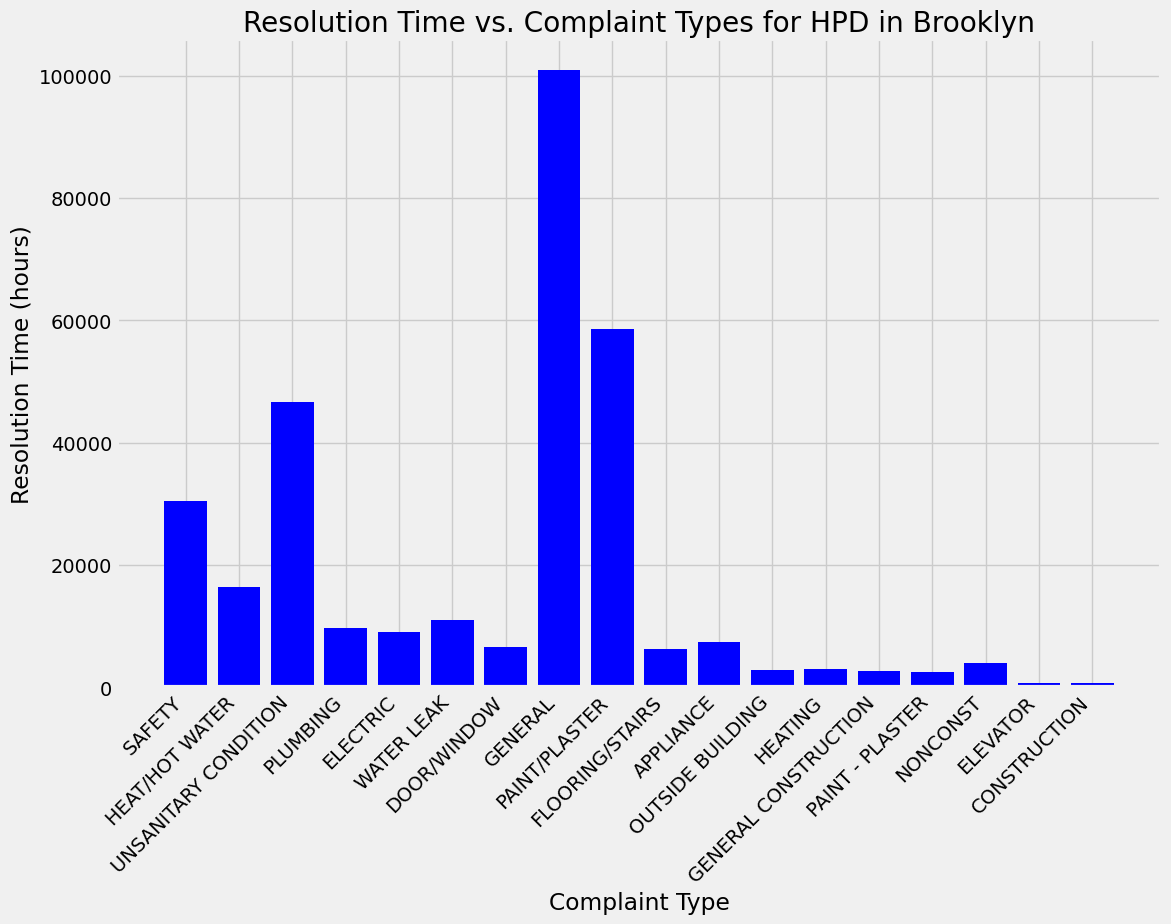

In [20]:
import matplotlib.pyplot as plt

# Plotting resolution time vs. complaint types using plt.bar
plt.figure(figsize=(12, 8))
plt.bar(hpd_df['Complaint Type'], hpd_df['Resolution Time'], color='blue')
plt.title('Resolution Time vs. Complaint Types for HPD in Brooklyn')
plt.xlabel('Complaint Type')
plt.ylabel('Resolution Time (hours)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

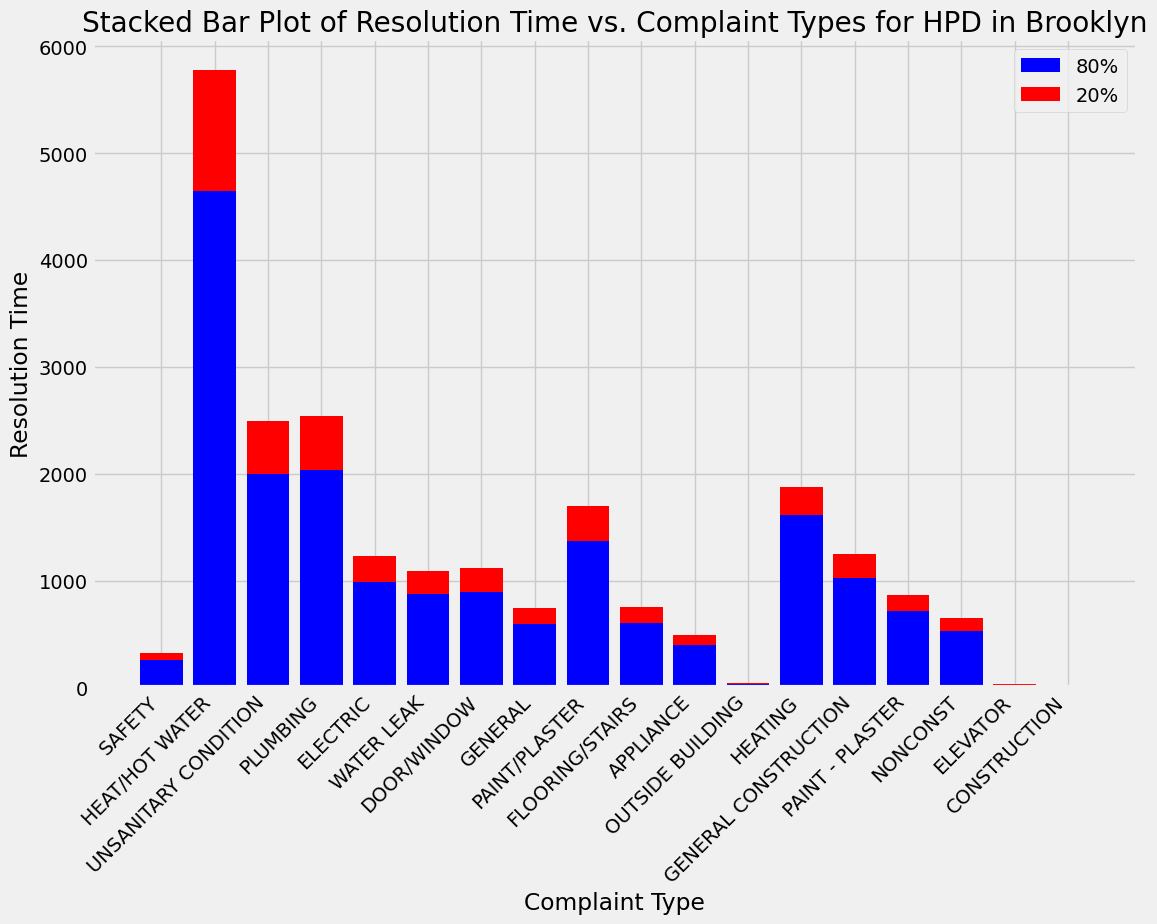

In [21]:
# Dividing the data into 2 parts (less than and greater than 80th percentile) to filter out delays
lower_part_counts = []
upper_part_counts = []
for ct in hpd_df['Complaint Type'].unique():
    df_temp = hpd_df[hpd_df['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    # Preparing lower than 80 percentile and greater than 80 percentile records
    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    lower_part_counts.append(len(lower_part))
    upper_part_counts.append(len(upper_part))

# Get unique complaint types
unique_complaint_types = hpd_df['Complaint Type'].unique()

# Plotting stacked bar plot
plt.figure(figsize=(12, 8))
plt.bar(unique_complaint_types, lower_part_counts, color='blue', label='80%')
plt.bar(unique_complaint_types, upper_part_counts, bottom=lower_part_counts, color='red', label='20%')

plt.title('Stacked Bar Plot of Resolution Time vs. Complaint Types for HPD in Brooklyn')
plt.xlabel('Complaint Type')
plt.ylabel('Resolution Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


In [22]:
# Calculating delay score for HPD
delay_score_hpd = 0
for ct in hpd_df['Complaint Type'].unique():
    df_temp = hpd_df[hpd_df['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_hpd = delay_score_hpd+(len(upper_part)/(len(lower_part)+len(upper_part)))

print("The delay score for HPD in Brooklyn is:")
print(delay_score_hpd)

The delay score for HPD in Brooklyn is:
3.518891756021852


In [23]:
# Create a new DataFrame with values from the 'NYPD' department
nypd_df_br = brooklyn_df[brooklyn_df['Agency'] == 'NYPD'].copy()

# Display the new DataFrame
print("DataFrame for NYPD in Brooklyn:")
print(nypd_df_br.head())

DataFrame for NYPD in Brooklyn:
     POPULATION Agency           Complaint Type               Location Type  \
520     62426.0   NYPD  Noise - Street/Sidewalk             Street/Sidewalk   
526     62426.0   NYPD      Noise - Residential  Residential Building/House   
533     62426.0   NYPD          Illegal Parking             Street/Sidewalk   
534     62426.0   NYPD      Noise - Residential  Residential Building/House   
537     62426.0   NYPD         Blocked Driveway             Street/Sidewalk   

    Address Type      City Community Board           BBL   Borough  \
520      ADDRESS  BROOKLYN     08 BROOKLYN  3012280007.0  BROOKLYN   
526      ADDRESS  BROOKLYN     08 BROOKLYN  3012350065.0  BROOKLYN   
533      ADDRESS  BROOKLYN     09 BROOKLYN  3014220001.0  BROOKLYN   
534      ADDRESS  BROOKLYN     08 BROOKLYN  3013610056.0  BROOKLYN   
537      ADDRESS  BROOKLYN     09 BROOKLYN  3014090016.0  BROOKLYN   

    Open Data Channel Type   Latitude  Longitude  Resolution Time  \
520

In [24]:
# Calculating delay score for NYPD
delay_score_nypd_br = 0
for ct in nypd_df_br['Complaint Type'].unique():
    df_temp = nypd_df_br[nypd_df_br['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_nypd_br = delay_score_nypd_br+(len(upper_part)/(len(lower_part)+len(upper_part)))

dsc.append(delay_score_nypd_br)
print("The delay score for NYPD in Brooklyn is:")
print(delay_score_nypd_br)

The delay score for NYPD in Brooklyn is:
5.594296042804524


In [25]:
# Create a new DataFrame with values from the 'DSNY' department
dsny_df = brooklyn_df[brooklyn_df['Agency'] == 'DSNY'].copy()

# Display the new DataFrame
print("DataFrame for DSNY in Brooklyn:")
print(dsny_df.head())

DataFrame for DSNY in Brooklyn:
     POPULATION Agency                       Complaint Type Location Type  \
525     62426.0   DSNY                    Derelict Vehicles        Street   
532     62426.0   DSNY                      Illegal Dumping      Sidewalk   
540     62426.0   DSNY  Request Large Bulky Item Collection      Sidewalk   
549     62426.0   DSNY            Street Sweeping Complaint        Street   
555     62426.0   DSNY                       Abandoned Bike  Intersection   

    Address Type      City Community Board           BBL   Borough  \
525      ADDRESS  BROOKLYN     08 BROOKLYN  3013420018.0  BROOKLYN   
532      ADDRESS  BROOKLYN     09 BROOKLYN  3012850048.0  BROOKLYN   
540      ADDRESS  BROOKLYN     08 BROOKLYN  3013680045.0  BROOKLYN   
549      ADDRESS  BROOKLYN     09 BROOKLYN  3014070040.0  BROOKLYN   
555      ADDRESS  BROOKLYN     09 BROOKLYN  3012920046.0  BROOKLYN   

    Open Data Channel Type   Latitude  Longitude  Resolution Time  \
525            

In [26]:
# Calculating delay score for DSNY
delay_score_dsny = 0
for ct in dsny_df['Complaint Type'].unique():
    df_temp = dsny_df[dsny_df['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_dsny = delay_score_dsny+(len(upper_part)/(len(lower_part)+len(upper_part)))

print("The delay score for DSNY in Brooklyn is:")
print(delay_score_dsny)

The delay score for DSNY in Brooklyn is:
8.440879983566761


In [27]:
# Create a new DataFrame with values from the 'DEP' department
dep_df = brooklyn_df[brooklyn_df['Agency'] == 'DEP'].copy()

# Display the new DataFrame
print("DataFrame for DEP in Brooklyn:")
print(dep_df.head())

DataFrame for DEP in Brooklyn:
     POPULATION Agency Complaint Type Location Type Address Type      City  \
536     62426.0    DEP          Noise   Unspecified      ADDRESS  BROOKLYN   
578     62426.0    DEP       Asbestos   Unspecified      ADDRESS  BROOKLYN   
583     62426.0    DEP   Water System   Unspecified      ADDRESS  BROOKLYN   
609     62426.0    DEP   Water System   Unspecified      ADDRESS  BROOKLYN   
661     62426.0    DEP   Water System   Unspecified      ADDRESS  BROOKLYN   

    Community Board           BBL   Borough Open Data Channel Type   Latitude  \
536     08 BROOKLYN  3012420001.0  BROOKLYN                 ONLINE  40.672347   
578     08 BROOKLYN  3012650005.0  BROOKLYN                  PHONE  40.669688   
583     09 BROOKLYN  3012850022.0  BROOKLYN                  PHONE  40.667690   
609     08 BROOKLYN  3013820077.0  BROOKLYN                 ONLINE  40.670166   
661     08 BROOKLYN  3013920051.0  BROOKLYN                  PHONE  40.668559   

     Longitud

In [28]:
# Calculating delay score for DEP
delay_score_dep = 0
for ct in dep_df['Complaint Type'].unique():
    df_temp = dep_df[dep_df['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_dep = delay_score_dep+(len(upper_part)/(len(lower_part)+len(upper_part)))

print("The delay score for DEP in Brooklyn is:")
print(delay_score_dep)

The delay score for DEP in Brooklyn is:
2.253612250995225


In [29]:
# Create a new DataFrame with values from the 'DOB' department
dob_df = brooklyn_df[brooklyn_df['Agency'] == 'DOB'].copy()

# Display the new DataFrame
print("DataFrame for DOB in Brooklyn:")
print(dob_df.head())

DataFrame for DOB in Brooklyn:
     POPULATION Agency                 Complaint Type Location Type  \
535     62426.0    DOB                       Elevator   Unspecified   
539     62426.0    DOB          Real Time Enforcement   Unspecified   
618     62426.0    DOB  General Construction/Plumbing   Unspecified   
625     62426.0    DOB                       Elevator   Unspecified   
636     62426.0    DOB  General Construction/Plumbing   Unspecified   

    Address Type      City Community Board           BBL   Borough  \
535      ADDRESS  BROOKLYN     08 BROOKLYN  3013680074.0  BROOKLYN   
539      ADDRESS  BROOKLYN     08 BROOKLYN  3012230006.0  BROOKLYN   
618      ADDRESS  BROOKLYN     08 BROOKLYN  3012420048.0  BROOKLYN   
625      ADDRESS  BROOKLYN     03 BROOKLYN  3018710018.0  BROOKLYN   
636      ADDRESS  BROOKLYN     08 BROOKLYN  3012440090.0  BROOKLYN   

    Open Data Channel Type   Latitude  Longitude  Resolution Time  \
535                UNKNOWN  40.672166 -73.927000    

In [30]:
# Calculating delay score for DOB
delay_score_dob = 0
for ct in dob_df['Complaint Type'].unique():
    df_temp = dob_df[dob_df['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_dob = delay_score_dob+(len(upper_part)/(len(lower_part)+len(upper_part)))

print("The delay score for DOB in Brooklyn is:")
print(delay_score_dob)

The delay score for DOB in Brooklyn is:
5.875070354548036


In [31]:
# Creating df for Queens
Queens_df = borough_dfs['QUEENS']

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\1777951471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


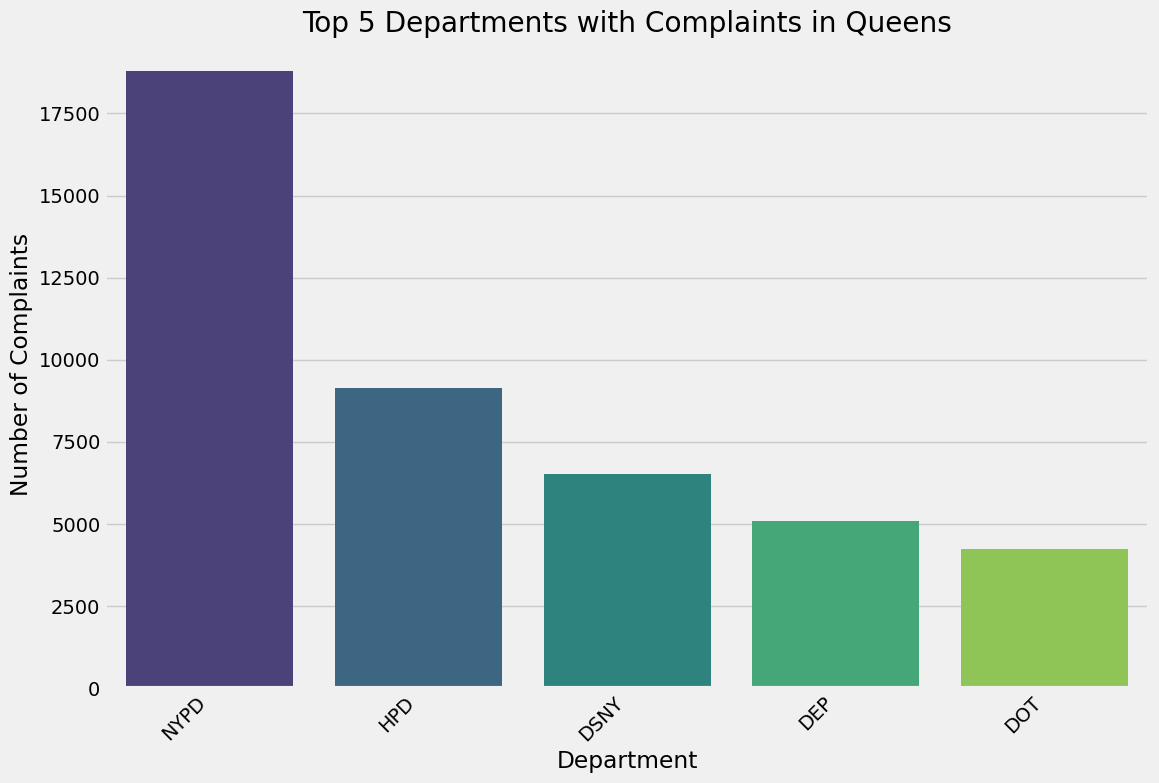

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt



# Count the number of complaints against each department
agency_counts = Queens_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Queens')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [33]:
# Create a new DataFrame with values from the 'NYPD' department
nypd_df_qu = Queens_df[Queens_df['Agency'] == 'NYPD'].copy()

# Display the new DataFrame
print("DataFrame for NYPD in Queens:")
print(nypd_df_qu.head())

DataFrame for NYPD in Queens:
    POPULATION Agency           Complaint Type    Location Type Address Type  \
2      18681.0   NYPD          Illegal Parking  Street/Sidewalk      ADDRESS   
6      18681.0   NYPD          Illegal Parking  Street/Sidewalk      ADDRESS   
12     18681.0   NYPD  Noise - Street/Sidewalk  Street/Sidewalk      ADDRESS   
15     18681.0   NYPD         Blocked Driveway  Street/Sidewalk      ADDRESS   
16     18681.0   NYPD         Blocked Driveway  Street/Sidewalk      ADDRESS   

       City Community Board           BBL Borough Open Data Channel Type  \
2   JAMAICA       12 QUEENS  4120550062.0  QUEENS                  PHONE   
6   JAMAICA       12 QUEENS  4120930020.0  QUEENS                  PHONE   
12  JAMAICA       12 QUEENS  4119790041.0  QUEENS                 ONLINE   
15  JAMAICA       12 QUEENS  4119910010.0  QUEENS                 MOBILE   
16  JAMAICA       12 QUEENS  4120910023.0  QUEENS                 MOBILE   

     Latitude  Longitude  Resolu

In [34]:
# Calculating delay score for NYPD
delay_score_nypd_qu = 0
for ct in nypd_df_qu['Complaint Type'].unique():
    df_temp = nypd_df_qu[nypd_df_qu['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_nypd_qu = delay_score_nypd_qu+(len(upper_part)/(len(lower_part)+len(upper_part)))
dsc.append(delay_score_nypd_qu)
print("The delay score for NYPD in Queens is:")
print(delay_score_nypd_qu)

The delay score for NYPD in Queens is:
5.385838481719224


In [35]:
# Creating df for Bronx
Bronx_df = borough_dfs['BRONX']

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\4250485714.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


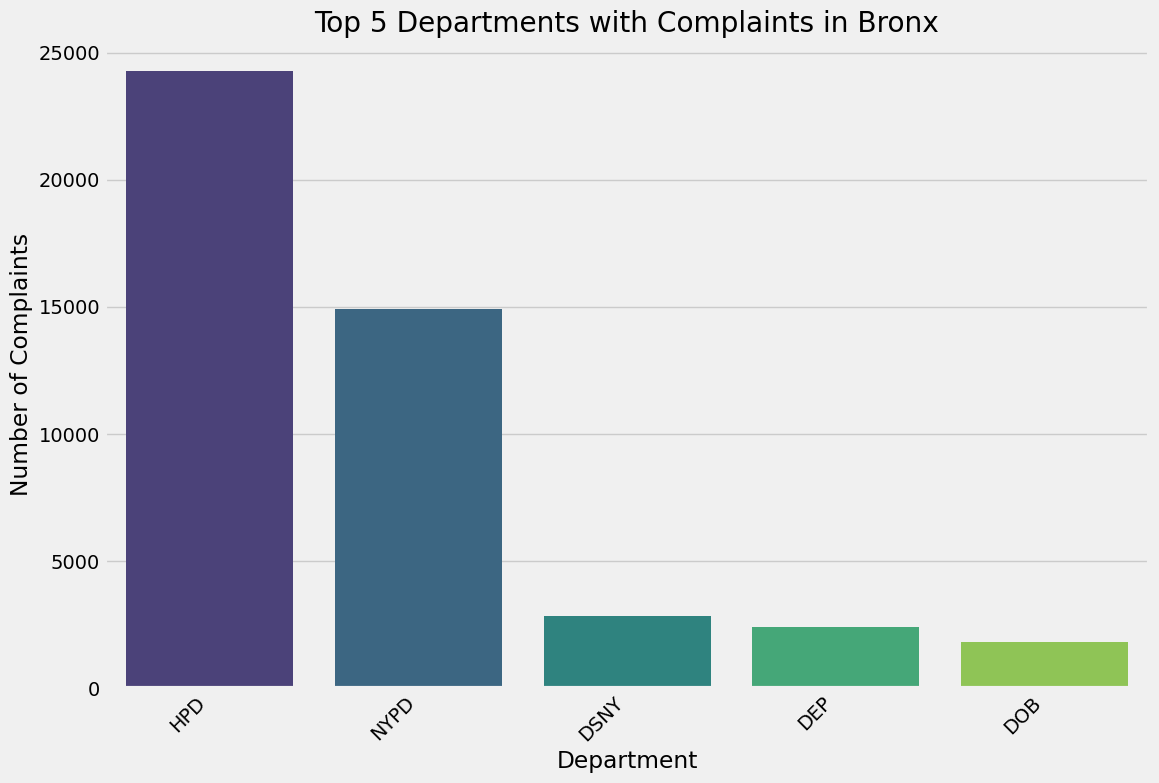

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of complaints against each department
agency_counts = Bronx_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Bronx')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [37]:
# Create a new DataFrame with values from the 'NYPD' department
nypd_df_bro = Bronx_df[Bronx_df['Agency'] == 'NYPD'].copy()

# Display the new DataFrame
print("DataFrame for NYPD in Bronx:")
print(nypd_df_bro.head())

DataFrame for NYPD in Bronx:
       POPULATION Agency     Complaint Type    Location Type  Address Type  \
22662     23477.0   NYPD    Illegal Parking  Street/Sidewalk       ADDRESS   
22663     23477.0   NYPD  Abandoned Vehicle  Street/Sidewalk       ADDRESS   
22666     23477.0   NYPD    Illegal Parking  Street/Sidewalk  INTERSECTION   
22669     23477.0   NYPD    Illegal Parking  Street/Sidewalk       ADDRESS   
22670     23477.0   NYPD   Blocked Driveway  Street/Sidewalk       ADDRESS   

        City Community Board           BBL Borough Open Data Channel Type  \
22662  BRONX        08 BRONX  2058821114.0   BRONX                 ONLINE   
22663  BRONX        08 BRONX  2058432032.0   BRONX                 ONLINE   
22666  BRONX        08 BRONX   Unspecified   BRONX                  PHONE   
22669  BRONX        08 BRONX  2058441916.0   BRONX                 MOBILE   
22670  BRONX        08 BRONX  2058831175.0   BRONX                  PHONE   

        Latitude  Longitude  Resolution

In [38]:
# Calculating delay score for NYPD
delay_score_nypd_bro = 0
for ct in nypd_df_bro['Complaint Type'].unique():
    df_temp = nypd_df_bro[nypd_df_bro['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_nypd_bro = delay_score_nypd_bro+(len(upper_part)/(len(lower_part)+len(upper_part)))
dsc.append(delay_score_nypd_bro)
print("The delay score for NYPD in Bronx is:")
print(delay_score_nypd_bro)

The delay score for NYPD in Bronx is:
5.784339813512438


In [39]:
# Creating df for Manhattan
Manhattan_df = borough_dfs['MANHATTAN']

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\4234334904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


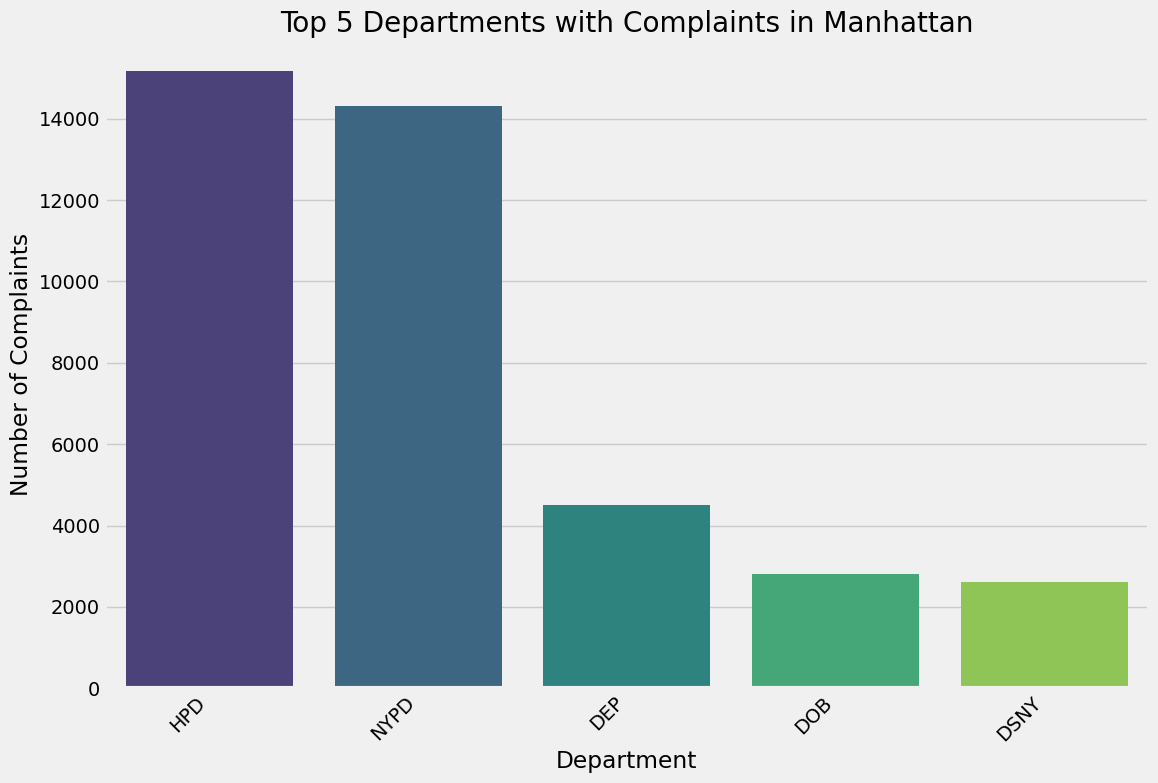

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of complaints against each department
agency_counts = Manhattan_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Manhattan')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [41]:
# Create a new DataFrame with values from the 'NYPD' department
nypd_df_ma = Manhattan_df[Manhattan_df['Agency'] == 'NYPD'].copy()

# Display the new DataFrame
print("DataFrame for NYPD in Manhattan:")
print(nypd_df_ma.head())

DataFrame for NYPD in Manhattan:
       POPULATION Agency           Complaint Type               Location Type  \
31305     70641.0   NYPD  Noise - Street/Sidewalk             Street/Sidewalk   
32380     70641.0   NYPD          Illegal Parking             Street/Sidewalk   
32435     70641.0   NYPD      Noise - Residential  Residential Building/House   
32506     70641.0   NYPD      Noise - Residential  Residential Building/House   
32579     70641.0   NYPD      Noise - Residential  Residential Building/House   

       Address Type       City Community Board           BBL    Borough  \
31305  INTERSECTION  MANHATTAN        08 BRONX   Unspecified  MANHATTAN   
32380       ADDRESS   NEW YORK        08 BRONX  1022150335.0  MANHATTAN   
32435       ADDRESS   NEW YORK        08 BRONX  1022150116.0  MANHATTAN   
32506       ADDRESS   NEW YORK        08 BRONX  1022150116.0  MANHATTAN   
32579       ADDRESS   NEW YORK        08 BRONX  1022150481.0  MANHATTAN   

      Open Data Channel Type 

In [42]:
# Calculating delay score for NYPD
delay_score_nypd_ma = 0
for ct in nypd_df_ma['Complaint Type'].unique():
    df_temp = nypd_df_ma[nypd_df_ma['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_nypd_ma = delay_score_nypd_ma+(len(upper_part)/(len(lower_part)+len(upper_part)))
dsc.append(delay_score_nypd_ma)
print("The delay score for NYPD in Manhattan is:")
print(delay_score_nypd_ma)

The delay score for NYPD in Manhattan is:
5.848007513497357


In [43]:
# Creating df for Staten Island
Staten_Island_df = borough_dfs['STATEN ISLAND']

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\1988509349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


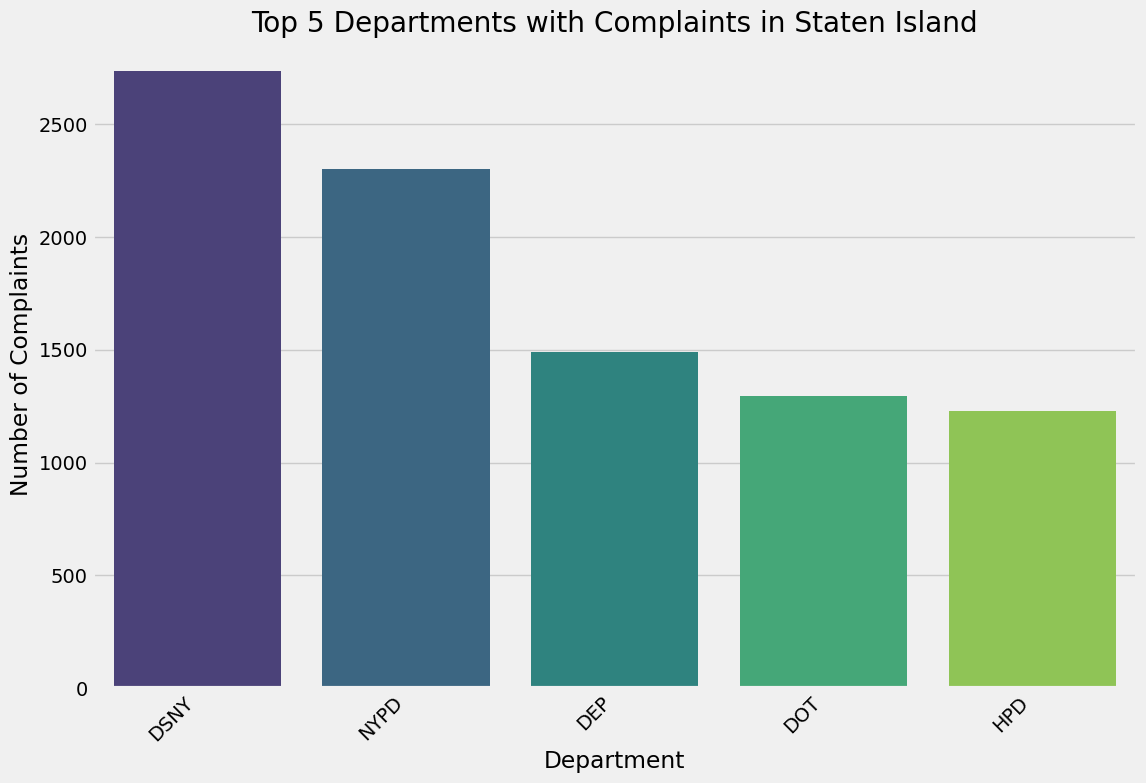

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of complaints against each department
agency_counts = Staten_Island_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Staten Island')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [45]:
# Create a new DataFrame with values from the 'NYPD' department
nypd_df_si = Staten_Island_df[Staten_Island_df['Agency'] == 'NYPD'].copy()

# Display the new DataFrame
print("DataFrame for NYPD in Staten Island:")
print(Staten_Island_df.head())

DataFrame for NYPD in Staten Island:
        POPULATION Agency                       Complaint Type  \
177280     40438.0   DSNY  Request Large Bulky Item Collection   
177281     40438.0    HPD                             PLUMBING   
177282     40438.0   NYPD                    Abandoned Vehicle   
177283     40438.0    DOT               Street Sign - Dangling   
177284     40438.0   DSNY  Request Large Bulky Item Collection   

               Location Type Address Type           City   Community Board  \
177280              Sidewalk      ADDRESS  STATEN ISLAND  01 STATEN ISLAND   
177281  RESIDENTIAL BUILDING      ADDRESS  STATEN ISLAND  01 STATEN ISLAND   
177282       Street/Sidewalk      ADDRESS  STATEN ISLAND  01 STATEN ISLAND   
177283                Street      ADDRESS  STATEN ISLAND  02 STATEN ISLAND   
177284              Sidewalk      ADDRESS  STATEN ISLAND  01 STATEN ISLAND   

                 BBL        Borough Open Data Channel Type   Latitude  \
177280  5000570030.0  ST

In [46]:
# Calculating delay score for NYPD
delay_score_nypd_si = 0
for ct in nypd_df_si['Complaint Type'].unique():
    df_temp = nypd_df_si[nypd_df_si['Complaint Type'] == ct]
    percentile_80 = df_temp['Resolution Time'].quantile(0.8)

    lower_part = df_temp[df_temp['Resolution Time'] <= percentile_80]
    upper_part = df_temp[df_temp['Resolution Time'] > percentile_80]

    delay_score_nypd_si = delay_score_nypd_si+(len(upper_part)/(len(lower_part)+len(upper_part)))
dsc.append(delay_score_nypd_si)
print("The delay score for NYPD in Staten Island is:")
print(delay_score_nypd_si)

The delay score for NYPD in Staten Island is:
7.407376955466311


In [47]:
print("The delay scores of all 5 boroughs are:\n")
dsc

The delay scores of all 5 boroughs are:



[5.594296042804524,
 5.385838481719224,
 5.784339813512438,
 5.848007513497357,
 7.407376955466311]

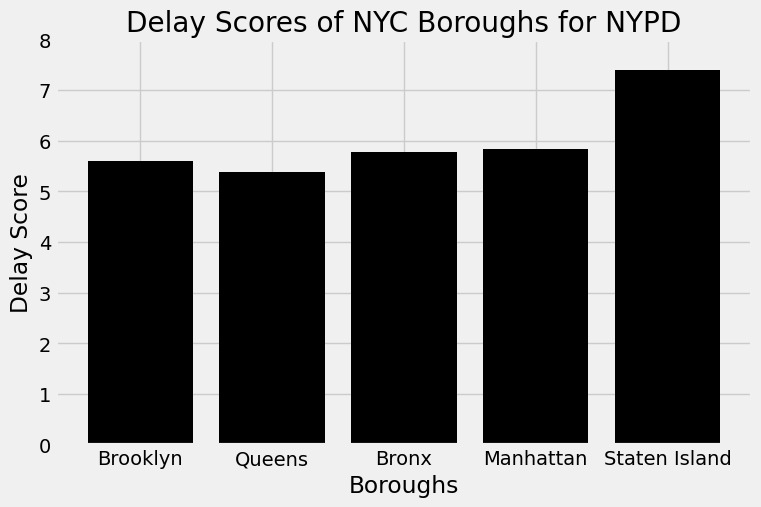

In [48]:
boroughs = ['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island']

# Plotting the bar chart of delay scores of all 5 boroughs
plt.figure(figsize=(8, 5))
plt.bar(boroughs, dsc, color='black')
plt.title('Delay Scores of NYC Boroughs for NYPD')
plt.xlabel('Boroughs')
plt.ylabel('Delay Score')
plt.ylim(0, 8)  # Set y-axis limit to represent scores
plt.show()

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\2307768754.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')


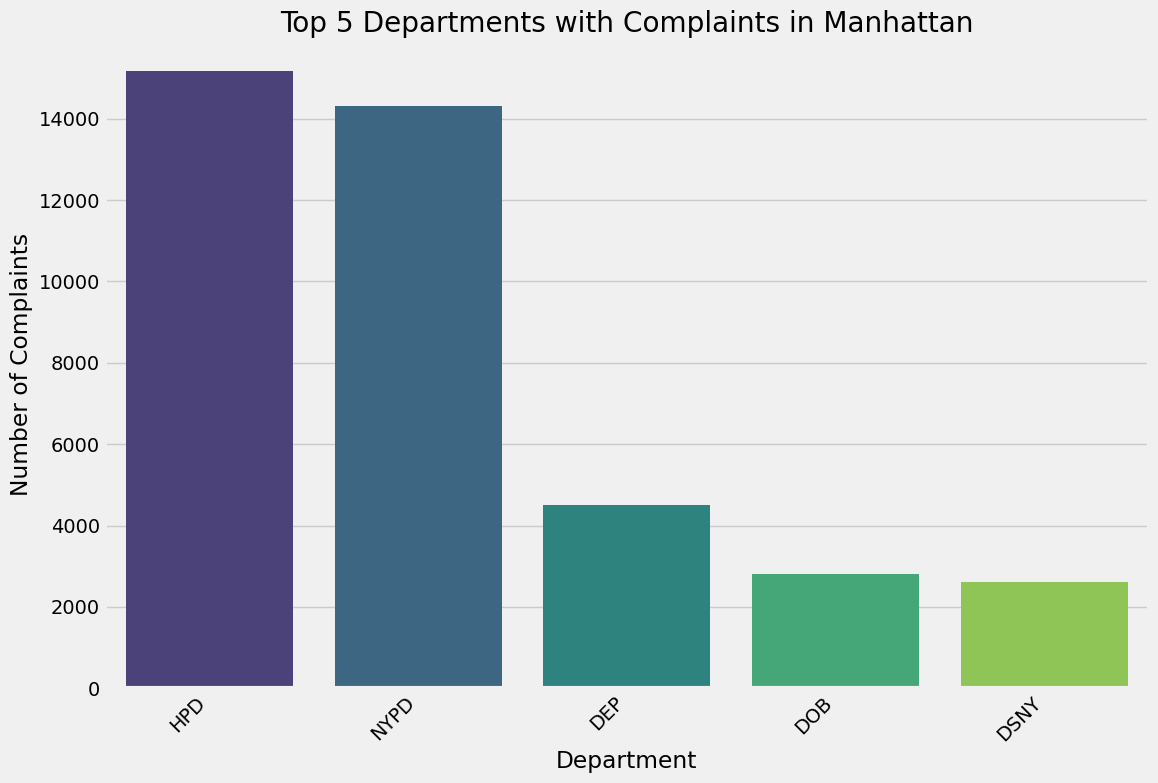

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

manhattan_df = borough_dfs['MANHATTAN']

# Count the number of complaints against each department
agency_counts = manhattan_df['Agency'].value_counts().nlargest(5)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=agency_counts.index, y=agency_counts.values, palette='viridis')
plt.title('Top 5 Departments with Complaints in Manhattan')
plt.xlabel('Department')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\sumed\AppData\Local\Temp\ipykernel_20964\1910109354.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaint_counts.index, y=complaint_counts.values, ax=ax1, palette='viridis')


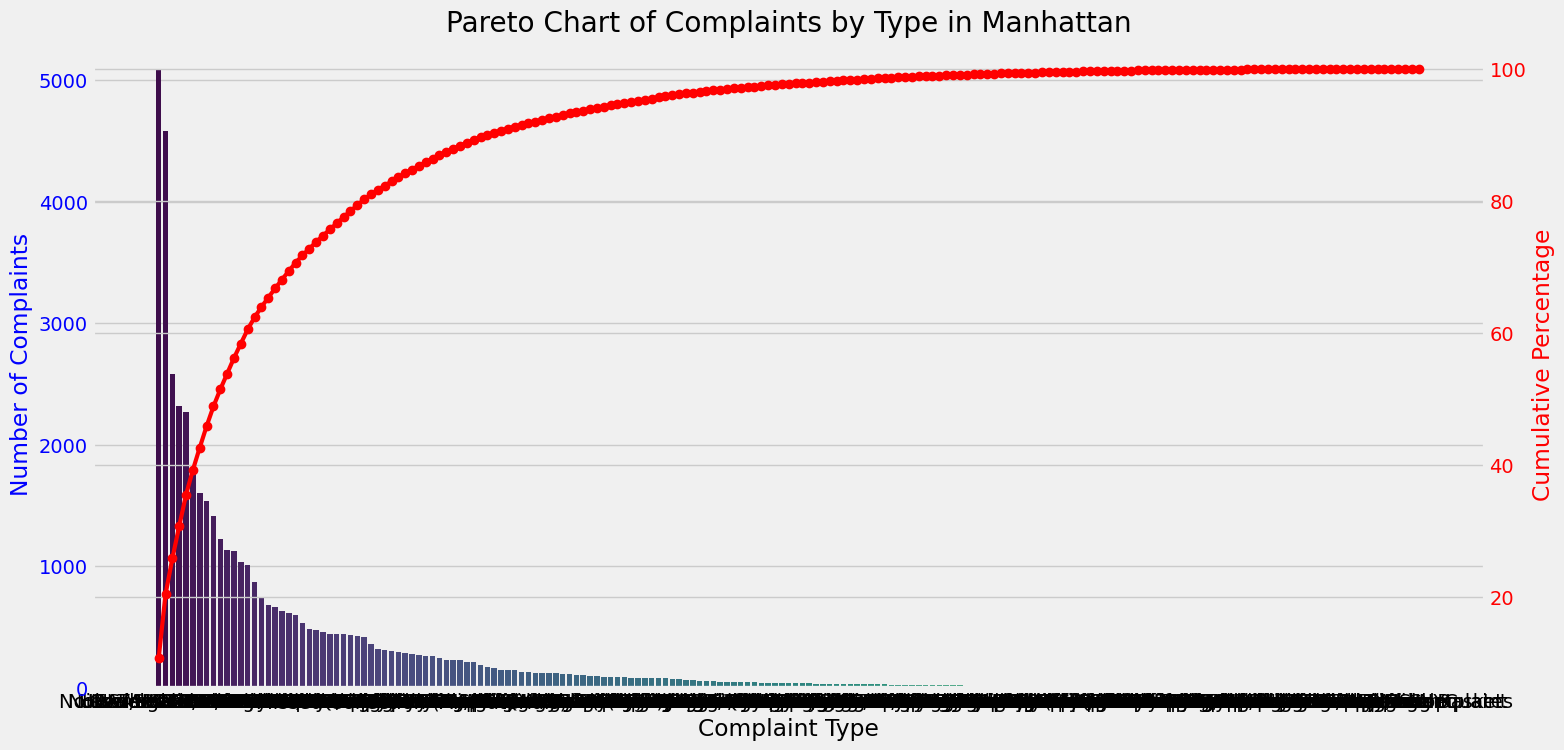

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

manhattan_df = borough_dfs['MANHATTAN']

# Count the number of complaints for each complaint type
complaint_counts = manhattan_df['Complaint Type'].value_counts()

# Calculate cumulative percentage
cumulative_percentage = complaint_counts.cumsum() / complaint_counts.sum() * 100

# Plotting the Pareto chart for number of complaints vs complaint types
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for complaint counts
sns.barplot(x=complaint_counts.index, y=complaint_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Complaints', color='b')
ax1.tick_params('y', colors='b')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(complaint_counts.index, cumulative_percentage, 'r-', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Chart of Complaints by Type in Manhattan')
plt.xlabel('Complaint Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [51]:
manhattan_df['Resolution Time'].head()

31094     134.848889
31142    4796.398333
31215     548.586667
31216      96.204167
31226     145.120833
Name: Resolution Time, dtype: float64

In [52]:
# Assuming 'Agency' and 'Complaint Type' are the columns in your DataFrame
# Replace them with the actual column names if different
manhattan_df = borough_dfs['MANHATTAN']

# Filter for the 'HPD' department
hpd_df = manhattan_df[manhattan_df['Agency'] == 'HPD']

# Count instances of each complaint type
complaint_types_count = hpd_df['Complaint Type'].value_counts()

# Display the result
print("Complaint Types and Their Instances for Department HPD:")
print(complaint_types_count)


Complaint Types and Their Instances for Department HPD:
Complaint Type
HEAT/HOT WATER          4583
UNSANITARY CONDITION    1601
PLUMBING                1537
HEATING                 1416
PAINT/PLASTER           1128
DOOR/WINDOW              676
GENERAL                  662
WATER LEAK               633
ELECTRIC                 616
GENERAL CONSTRUCTION     597
FLOORING/STAIRS          459
PAINT - PLASTER          435
NONCONST                 312
APPLIANCE                298
SAFETY                   165
OUTSIDE BUILDING          24
ELEVATOR                  24
CONSTRUCTION               5
Name: count, dtype: int64
